# Unsupervised Learning (K-means Clustering)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_excel(r"A:\Downloads\Chapter4_Geologic_DataSet.xlsx")

In [8]:
df

,GR_API,"Bulk Density, gcc","Resistivity, ohm-m","Water Saturation, fraction","PhiH, ft","TOC, fraction","TVD, ft"
0,118,2.2096,23,0.13,23,0.077,10670
1,170,2.2185,21,0.17,20,0.073,9932
2,166,2.2260,14,0.20,21,0.070,9747
3,166,2.2260,14,0.20,21,0.070,9747
4,135,2.2303,22,0.16,24,0.068,9222
...,...,...,...,...,...,...,...
433,123,2.2307,24,0.14,22,0.068,9605
434,141,2.2598,20,0.20,19,0.056,10086
435,157,2.2616,20,0.17,18,0.055,9008
436,142,2.2523,14,0.21,22,0.059,10397


In [10]:
df.sample(5)

,GR_API,"Bulk Density, gcc","Resistivity, ohm-m","Water Saturation, fraction","PhiH, ft","TOC, fraction","TVD, ft"
125,174,2.2594,44,0.14,20,0.056,8955
219,160,2.2467,22,0.14,14,0.059,10082
81,169,2.2404,15,0.20,20,0.064,10095
437,148,2.2331,19,0.17,24,0.067,9390
396,175,2.2367,25,0.14,19,0.065,11483


In [11]:
df.describe()

,GR_API,"Bulk Density, gcc","Resistivity, ohm-m","Water Saturation, fraction","PhiH, ft","TOC, fraction","TVD, ft"
count,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000
mean,157.972603,2.242265,22.438356,0.159863,20.283105,0.063221,9935.125571
std,30.396528,0.019978,7.971895,0.037465,3.187825,0.008410,827.981530
min,66.000000,2.209100,5.000000,0.100000,10.000000,0.032000,8046.000000
25%,139.000000,2.226425,17.000000,0.130000,19.000000,0.057000,9372.250000
50%,155.000000,2.239300,22.000000,0.150000,20.000000,0.065000,9844.500000
75%,178.000000,2.255925,26.000000,0.190000,22.000000,0.070000,10440.000000
max,259.000000,2.319600,49.000000,0.310000,33.000000,0.077000,12474.000000


In [17]:
df.isnull().sum()

GR_API                        0
Bulk Density, gcc             0
Resistivity, ohm-m            0
Water Saturation, fraction    0
PhiH, ft                      0
TOC, fraction                 0
TVD, ft                       0
dtype: int64

In this dataset we can see that we do not have null values in any column.So there is no need of imputation.
Also all the columns are numerical and continuous data. So we can train model.
Deviation between some features are larger, so we have to do scaling.

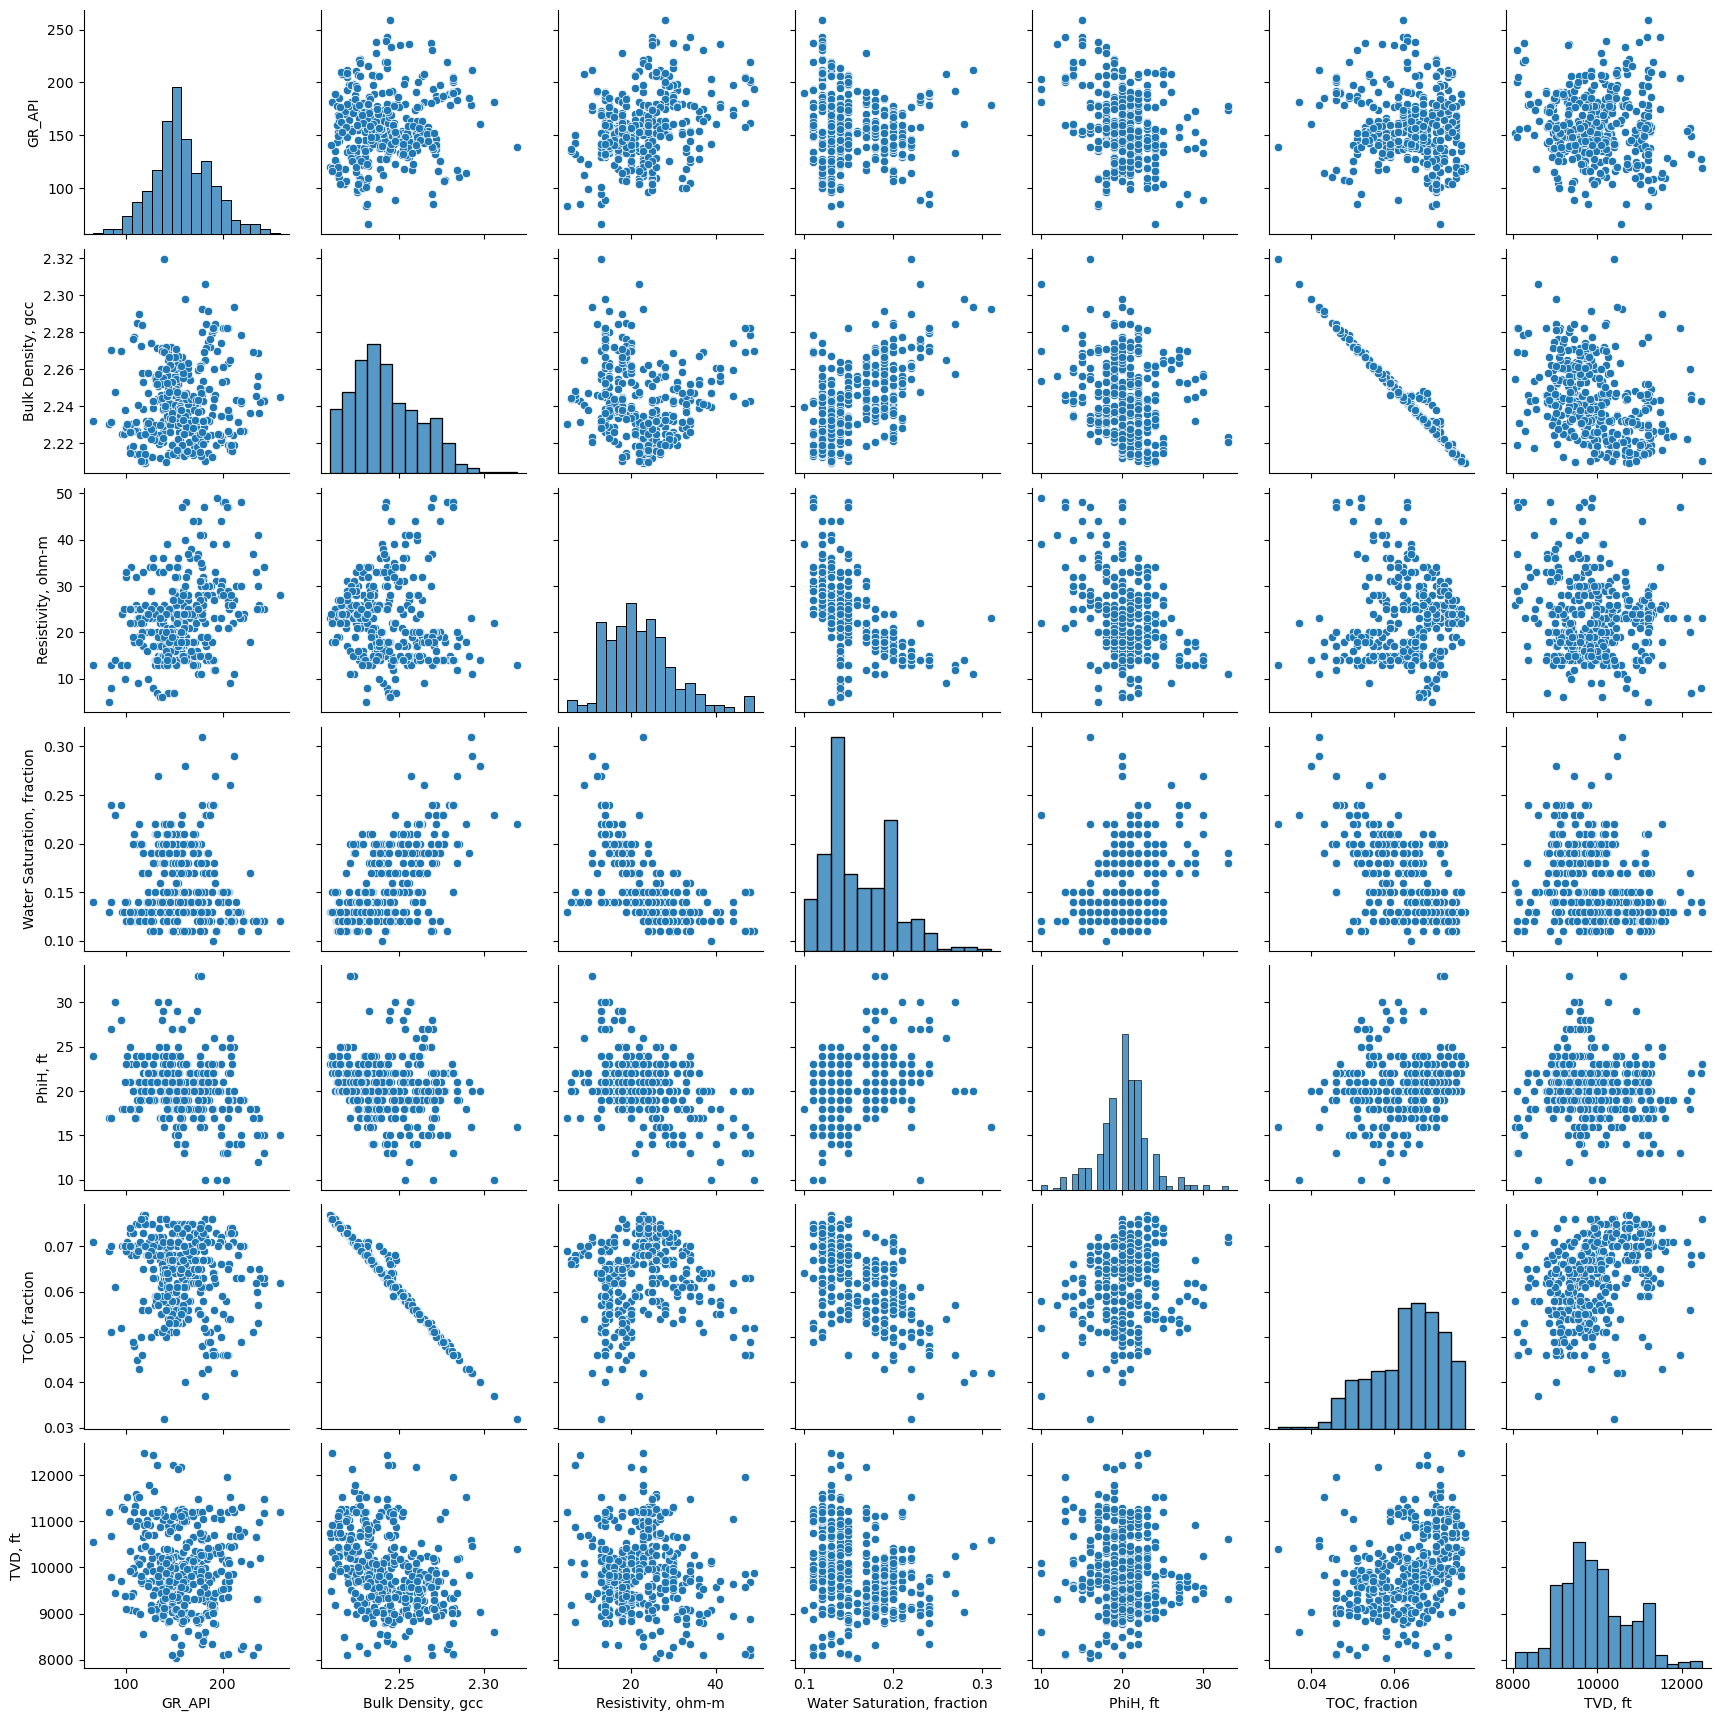

In [18]:
sns.pairplot(df)  #Relation of one features with others (checking collinearity). We can use heatmaps too.

# Feature Transformation

In [23]:
# Since TOC is derived from bulk density. So they will provide same information while clustering.
#So we should remove the features (Columns), i.e., TOC, fraction

df.drop(['TOC, fraction'], axis=1)

,GR_API,"Bulk Density, gcc","Resistivity, ohm-m","Water Saturation, fraction","PhiH, ft","TVD, ft"
0,118,2.2096,23,0.13,23,10670
1,170,2.2185,21,0.17,20,9932
2,166,2.2260,14,0.20,21,9747
3,166,2.2260,14,0.20,21,9747
4,135,2.2303,22,0.16,24,9222
...,...,...,...,...,...,...
433,123,2.2307,24,0.14,22,9605
434,141,2.2598,20,0.20,19,10086
435,157,2.2616,20,0.17,18,9008
436,142,2.2523,14,0.21,22,10397


# Scaling

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
df_scaled = scaler.fit(df)
df_scaled = scaler.transform(df)
df_scaled

array([[0.26943005, 0.00452489, 0.40909091, ..., 0.56521739, 1.        ,
        0.59259259],
       [0.5388601 , 0.08506787, 0.36363636, ..., 0.43478261, 0.91111111,
        0.42592593],
       [0.51813472, 0.15294118, 0.20454545, ..., 0.47826087, 0.84444444,
        0.38414634],
       ...,
       [0.47150259, 0.47511312, 0.34090909, ..., 0.34782609, 0.51111111,
        0.21725384],
       [0.39378238, 0.39095023, 0.20454545, ..., 0.52173913, 0.6       ,
        0.53093948],
       [0.42487047, 0.21719457, 0.31818182, ..., 0.60869565, 0.77777778,
        0.30352304]])

In [29]:
from sklearn.cluster import KMeans

In [42]:
wcss=[]
for i in range (1,18):
    km=KMeans(n_clusters=i,random_state=500,init='random',
             n_init='auto',max_iter=300)
    km.fit(df_scaled)
    wcss.append(km.inertia_) #inertia_ : Sum of squared distances of samples to their closest cluster center.


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

In [33]:
wcss

[92.31638720298692,
 64.56103419862143,
 50.50052407660331,
 43.19177635111551,
 38.79644675833657,
 35.48144279208721,
 32.804515919286295,
 30.493825592180734,
 28.326994268361638,
 26.73441511154848,
 25.325440008631105,
 24.35198022074634,
 23.34121774963988,
 22.63391332245473]

Text(0, 0.5, 'WCSS')

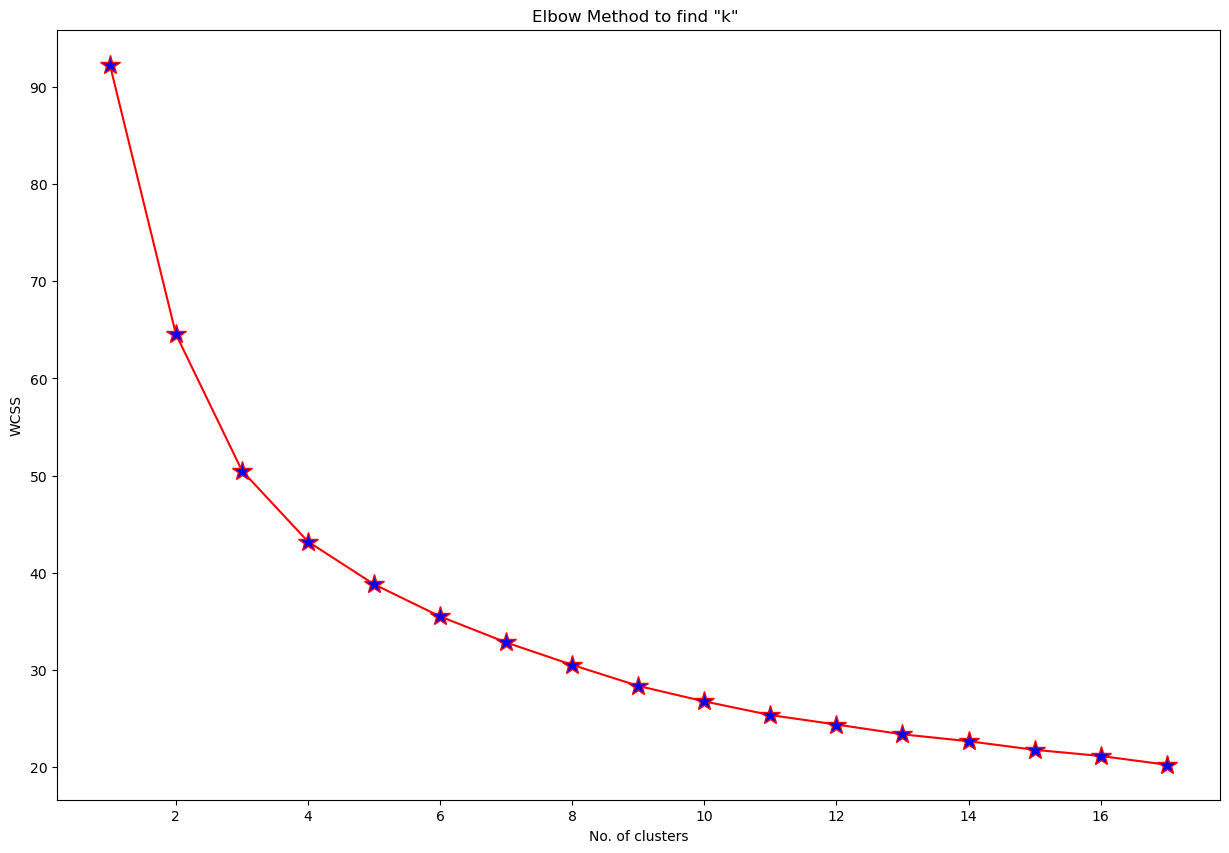

In [52]:
fig=plt.figure(figsize=(15,10))
plt.plot(range(1,18),wcss, marker='*', color='r', markerfacecolor='b',
        markersize=15)
plt.title('Elbow Method to find "k" ')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')

In the above graph we can see that that after 11th clusters there is very less changes in the slope.

So, we will choose k=11

In [67]:
km = KMeans(n_clusters=11,random_state=500,init='random',
             n_init='auto',max_iter=300)
km=km.fit(df_scaled)
print(km.cluster_centers_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[[0.61781396 0.68162034 0.21645022 0.67346939 0.46169772 0.3026455
  0.29317761]
 [0.52782158 0.34719654 0.63735178 0.1884058  0.36011342 0.6410628
  0.26529791]
 [0.32124352 0.14078054 0.48082386 0.13244048 0.51358696 0.85416667
  0.3060778 ]
 [0.38585797 0.50889007 0.29311497 0.45378151 0.4584399  0.4748366
  0.37492029]
 [0.3738927  0.27893738 0.19208211 0.2718894  0.44179523 0.75268817
  0.69097678]
 [0.68005181 0.55271493 0.84943182 0.12797619 0.16847826 0.43055556
  0.31382678]
 [0.56917098 0.14295626 0.45340909 0.15793651 0.44565217 0.85259259
  0.44790726]
 [0.35945596 0.08887632 0.43607955 0.11507937 0.44565217 0.90694444
  0.67804784]
 [0.76165803 0.23093083 0.49512987 0.16156463 0.3431677  0.76190476
  0.62212866]
 [0.45751295 0.26505495 0.26136364 0.40884354 0.47515528 0.73047619
  0.33261066]
 [0.42918826 0.37285068 0.25378788 0.46296296 0.80917874 0.61358025
  0.36947957]]


In [75]:
# To return the value of clusters
y_means= km.fit_predict(df_scaled)
y_means

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


array([ 7,  6,  9,  9,  2,  3,  5,  6,  6,  6,  3,  3,  3,  3,  6,  1,  7,
        3,  7,  6,  1,  6,  7,  8,  1,  9, 10,  9,  4,  9,  0,  3,  6,  3,
        9,  0,  1,  6,  6, 10, 10,  3,  3,  9,  1,  3,  8,  1,  4,  3,  6,
        6,  2,  6,  2,  8,  7,  6,  8,  3,  9,  2,  7, 10,  9,  6,  7,  5,
        5,  6,  9,  9,  4,  7,  8,  5,  7,  3,  0,  1, 10,  9,  6,  6,  6,
        7, 10,  3,  6,  7,  1,  5,  7,  7,  6,  3,  9,  3,  3,  0, 10,  6,
        6,  2,  9, 10,  2,  2,  0,  9, 10,  8,  2,  6,  6,  1,  7,  4,  7,
        1,  9,  3,  9,  6,  9,  1,  9,  1,  1,  8,  2,  1, 10,  9,  1,  9,
        3,  1,  4,  8,  7,  8,  0,  2,  9,  9,  4,  1,  3,  2,  3,  4,  3,
        3,  8,  6,  1,  7,  9,  1,  0,  6,  7,  1,  5,  9,  0, 10,  4,  1,
        6,  9,  1,  3,  3,  9,  7,  2,  7,  7,  7,  2,  0,  1,  3, 10, 10,
        3,  9,  9,  3,  9,  4,  6,  9,  0,  3,  8,  7,  5,  4,  5,  2,  6,
        6,  1,  7,  7,  6,  7,  5,  5,  0,  2,  3,  9,  9,  3,  4,  1,  4,
        3,  3,  3,  3,  1

In [70]:
# Another way of getting the values of cluster or labels of each well.
labels=km.labels_
labels

array([ 7,  6,  9,  9,  2,  3,  5,  6,  6,  6,  3,  3,  3,  3,  6,  1,  7,
        3,  7,  6,  1,  6,  7,  8,  1,  9, 10,  9,  4,  9,  0,  3,  6,  3,
        9,  0,  1,  6,  6, 10, 10,  3,  3,  9,  1,  3,  8,  1,  4,  3,  6,
        6,  2,  6,  2,  8,  7,  6,  8,  3,  9,  2,  7, 10,  9,  6,  7,  5,
        5,  6,  9,  9,  4,  7,  8,  5,  7,  3,  0,  1, 10,  9,  6,  6,  6,
        7, 10,  3,  6,  7,  1,  5,  7,  7,  6,  3,  9,  3,  3,  0, 10,  6,
        6,  2,  9, 10,  2,  2,  0,  9, 10,  8,  2,  6,  6,  1,  7,  4,  7,
        1,  9,  3,  9,  6,  9,  1,  9,  1,  1,  8,  2,  1, 10,  9,  1,  9,
        3,  1,  4,  8,  7,  8,  0,  2,  9,  9,  4,  1,  3,  2,  3,  4,  3,
        3,  8,  6,  1,  7,  9,  1,  0,  6,  7,  1,  5,  9,  0, 10,  4,  1,
        6,  9,  1,  3,  3,  9,  7,  2,  7,  7,  7,  2,  0,  1,  3, 10, 10,
        3,  9,  9,  3,  9,  4,  6,  9,  0,  3,  8,  7,  5,  4,  5,  2,  6,
        6,  1,  7,  7,  6,  7,  5,  5,  0,  2,  3,  9,  9,  3,  4,  1,  4,
        3,  3,  3,  3,  1

In [72]:
df_scaled[labels ==0]

array([[0.60103627, 0.87692308, 0.38636364, 0.61904762, 0.        ,
        0.11111111, 0.12511292],
       [0.62694301, 0.60633484, 0.20454545, 0.61904762, 0.52173913,
        0.37777778, 0.2296748 ],
       [0.64766839, 0.66425339, 0.20454545, 0.66666667, 0.52173913,
        0.31111111, 0.2429991 ],
       [0.37823834, 1.        , 0.18181818, 0.57142857, 0.26086957,
        0.        , 0.53093948],
       [0.62694301, 0.56832579, 0.20454545, 0.66666667, 0.52173913,
        0.42222222, 0.25067751],
       [0.49222798, 0.80452489, 0.20454545, 0.85714286, 0.43478261,
        0.17777778, 0.22086721],
       [0.58549223, 0.64072398, 0.22727273, 0.66666667, 0.52173913,
        0.35555556, 0.29019874],
       [0.60621762, 0.68144796, 0.27272727, 0.38095238, 0.47826087,
        0.31111111, 0.21793135],
       [0.64766839, 0.65429864, 0.20454545, 0.66666667, 0.56521739,
        0.33333333, 0.23599819],
       [0.61658031, 0.59366516, 0.20454545, 0.61904762, 0.47826087,
        0.37777778, 0.2

Text(0, 0.5, 'Bulk Density')

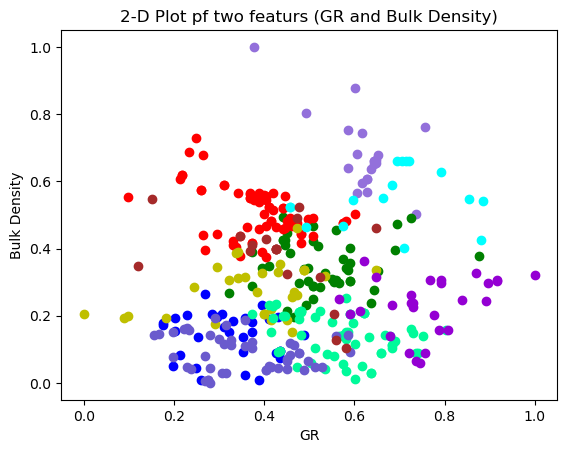

In [97]:
plt.scatter(df_scaled[y_means == 0,0],df_scaled[y_means ==0,1],
            color='mediumpurple')

plt.scatter(df_scaled[y_means ==1,0],df_scaled[y_means ==1,1],
             color='green')

plt.scatter(df_scaled[y_means ==2,0],df_scaled[y_means ==2,1],
             color='b')

plt.scatter(df_scaled[y_means ==3,0],df_scaled[y_means ==3,1],
             color='r')

plt.scatter(df_scaled[y_means ==4,0],df_scaled[y_means ==4,1],
             color='y')

plt.scatter(df_scaled[y_means ==5,0],df_scaled[y_means ==5,1],
             color='aqua')

plt.scatter(df_scaled[y_means ==6,0],df_scaled[y_means ==6,1],
             color='mediumspringgreen')

plt.scatter(df_scaled[y_means ==7,0],df_scaled[y_means ==7,1],
             color='slateblue')

plt.scatter(df_scaled[y_means ==8,0],df_scaled[y_means ==8,1],
             color='darkviolet')

plt.scatter(df_scaled[y_means ==91,0],df_scaled[y_means ==91,1],
             color='purple')

plt.scatter(df_scaled[y_means ==10,0],df_scaled[y_means ==10,1],
             color='brown')

plt.scatter(df_scaled[y_means ==11,0],df_scaled[y_means ==11,1],
 color='black')

plt.title("2-D Plot pf two featurs (GR and Bulk Density)")
plt.xlabel("GR")
plt.ylabel("Bulk Density")

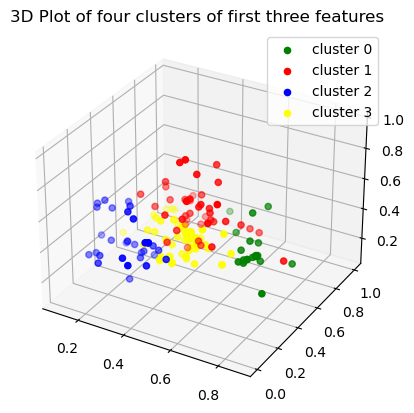

In [99]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_scaled[y_means == 0,0],df_scaled[y_means ==0,1],
            df_scaled[y_means ==0,2],
           color ='green', label='cluster 0')
                     
ax.scatter(df_scaled[y_means ==1,0],df_scaled[y_means ==1,1],
            df_scaled[y_means ==1,2],
           color='red', label='cluster 1')
                     
ax.scatter(df_scaled[y_means ==2,0],df_scaled[y_means ==2,1],
            df_scaled[y_means ==2,2],
           color='b', label='cluster 2')
                     
ax.scatter(df_scaled[y_means ==3,0],df_scaled[y_means ==3,1],
            df_scaled[y_means ==3,2],
           color='yellow', label='cluster 3')
                    

plt.title("3D Plot of four clusters of first three features ")
plt.legend()
plt.show()

In [103]:
df_scaled=pd.DataFrame(df_scaled,columns=df.columns[0:7])
df_scaled['clusters']=labels
df_scaled
#This will give Standardized labeled data

,GR_API,"Bulk Density, gcc","Resistivity, ohm-m","Water Saturation, fraction","PhiH, ft","TOC, fraction","TVD, ft",clusters
0,0.269430,0.004525,0.409091,0.142857,0.565217,1.000000,0.592593,7
1,0.538860,0.085068,0.363636,0.333333,0.434783,0.911111,0.425926,6
2,0.518135,0.152941,0.204545,0.476190,0.478261,0.844444,0.384146,9
3,0.518135,0.152941,0.204545,0.476190,0.478261,0.844444,0.384146,9
4,0.357513,0.191855,0.386364,0.285714,0.608696,0.800000,0.265583,2
...,...,...,...,...,...,...,...,...
433,0.295337,0.195475,0.431818,0.190476,0.521739,0.800000,0.352078,2
434,0.388601,0.458824,0.340909,0.476190,0.391304,0.533333,0.460705,3
435,0.471503,0.475113,0.340909,0.333333,0.347826,0.511111,0.217254,3
436,0.393782,0.390950,0.204545,0.523810,0.521739,0.600000,0.530939,3


In [104]:
df_scaled.groupby(by='clusters').count()

,GR_API,"Bulk Density, gcc","Resistivity, ohm-m","Water Saturation, fraction","PhiH, ft","TOC, fraction","TVD, ft"
clusters,,,,,,,
0,21,21,21,21,21,21,21
1,46,46,46,46,46,46,46
2,32,32,32,32,32,32,32
3,68,68,68,68,68,68,68
4,31,31,31,31,31,31,31
5,16,16,16,16,16,16,16
6,60,60,60,60,60,60,60
7,48,48,48,48,48,48,48
8,28,28,28,28,28,28,28
